# Project: Investigate a Movie Dataset to understand what are the factors influencing the profit of a movie


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Profit(a dependant variable) is derived by subtracting budget from revenue
> <br/> Release Year, popularity and genres are considered to be the independant variables


In [1]:
#importing the necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from pandas.tools.plotting import scatter_matrix

<a id='wrangling'></a>
## Data Wrangling

>In this step, I will clean my data, check for inconsistent data types, NaN values etc.

### General Properties

In [2]:
#loading data
df=pd.read_csv(r'C:/Users/sarita.machado/Desktop/tmdb-movies.csv')

In [3]:
#using the head command to understand the data in the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning (Removing the unwanted cell columns and checking and replacing NaN values)

> From the result of the head operation, I understand the cast, genres and production_companies has data separated by '|'. 
> <br>For me, only the genres will help in the later part of the investigation. 
> <br>I will delete the other 2 columns, i.e cast and production_companies

In [4]:
# Dropping production_companies and cast
df.drop(['production_companies','cast'],axis=1,inplace=True)

In [5]:
#Verifying if the drop function worked
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
#Checking for Duplicate values
df.duplicated().sum()
#Dropping the duplicated row
df.drop_duplicates(inplace=True)

In [7]:
# Checking which columns has null values
df.isna().sum()

id                   0
imdb_id             10
popularity           0
budget               0
revenue              0
original_title       0
homepage          7929
director            44
tagline           2824
keywords          1493
overview             4
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [8]:
# Checking the datatype of the null values
df.dtypes

id                  int64
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
homepage           object
director           object
tagline            object
keywords           object
overview           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [9]:
# Replacing column-wise, the null values by "" since all the columns which has null values are of string data type
df['imdb_id'].fillna("0",inplace=True)
df['homepage'].fillna("0",inplace=True)
df['director'].fillna("0",inplace=True)
df['tagline'].fillna("0",inplace=True)
df['keywords'].fillna("0",inplace=True)
df['overview'].fillna("0",inplace=True)
df['genres'].fillna("0",inplace=True)

In [10]:
# Verifying if the fillna() function worked
df.isna().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
homepage          0
director          0
tagline           0
keywords          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
# Since imdb_id has 'tt' has a pre-script, I plan to extract the number out of it
df['imdb_id']=df['imdb_id'].str.extract('(\d+)')
# Confirming if the extract function worked
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [12]:
#I want to use movie genres in the later part of my intesgiation of dataset. 
#Hence I plan to split the data of genres into multiple columns
df_genres=pd.concat([df['genres'].str.split('|', expand=True)], axis=1)
df_genres.head(4)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None


In [13]:
# I plan to drop the last column i.e 4 since it has mostly no value
df_genres.drop(4,axis=1,inplace=True)

In [14]:
# Renaming the other columns of df_genres , by replacing '0' by 'genres_0'
df_genres.rename(columns={0:'genres_0',1:'genres_1',2:'genres_2',3:'genres_3'},inplace = True)
#Confirming the changes
df_genres.head(1)

,genres_0,genres_1,genres_2,genres_3
0,Action,Adventure,Science Fiction,Thriller


In [15]:
# Checking the output of df_genres
# Adding the df_genres to the main dataframe
df=pd.concat([df,df_genres],axis=1)
#dropping genres since we already have our data  of genres into different columns
df.drop('genres',axis=1,inplace=True)
df.head(1)
# We get all the genres of a movie into the same row

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_0,genres_1,genres_2,genres_3
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller


In [16]:
#I want to make profit as the dependant criteria rather than revenue, 
#Hence subtracting the movie budget from the revenue to derive profit
df['profit']=df['revenue']-df['budget']

In [17]:
#Confirming the changes
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_0,genres_1,genres_2,genres_3,profit
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,1363528810


<a id='eda'></a>
## Exploratory Data Analysis

> In this section , I plan to check how the various independant variables play a role on the dependant variable (Profit)
In my first question, I am using scatter plot and bar plot as visulalization methods to check the effect of popularity of a film on profit
### Research Question 1 Does Popularity of the film means more profit?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248DDB077B8>,
      dtype=object)

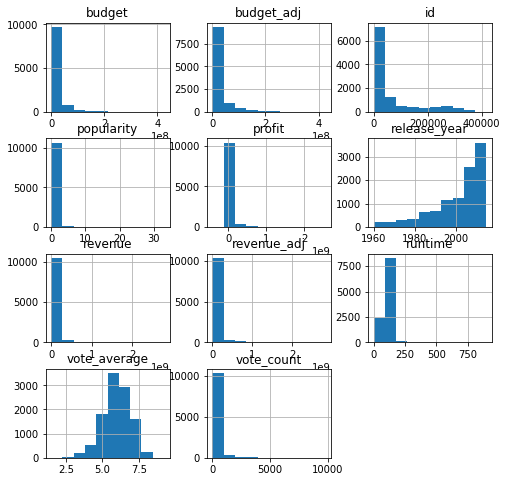

In [18]:
# Before venturing into more details of individual variables and their impact on the profit of a movie. 
#A histogram will give a visual idea of how the data is distributed
df.hist(figsize=(8,8))

In [19]:
# the histogram shows that all variables, except vote_average and release_year, are skewed to the right

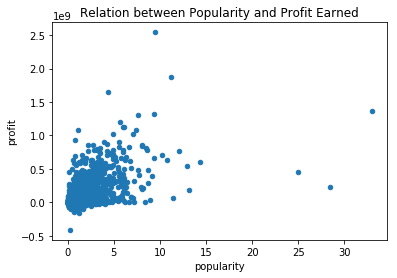

In [20]:
# A simple method to see the relation between popularity and profit is through scatter plot
df.plot(x='popularity',y='profit',kind='scatter',title='Relation between Popularity and Profit Earned')
#We can see a few outliers and mostly rhe data points are very close to each other. 
#This does not give a clear picture. Hence we will move ahead with checking the relation by using a bar plot


In [21]:
df.describe()
#Through my describe function I want to cut popularity into different bins like 'Low Popular','Medium Popular','Highly Popular','Extremely Popular'


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [22]:
# Bin edges that will be used to "cut" the data into groups
#bin_edges = [0.000065,0.207575,0.383831,0.713857,32.985763] # Filling in this list with five values I just found
bin_edges = [0.000065,0.207575,0.383831,0.713857,32.985763] 
bin_labels=['Low Popular','Medium Popular','Highly Popular','Extremely Popular']
df['popularity_levels']=pd.cut(df['popularity'],bin_edges,labels=bin_labels)
#Using the cut function to bin popularity of the movie

In [23]:
#Confirming the changes
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,vote_average,release_year,budget_adj,revenue_adj,genres_0,genres_1,genres_2,genres_3,profit,popularity_levels
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,1363528810,Extremely Popular


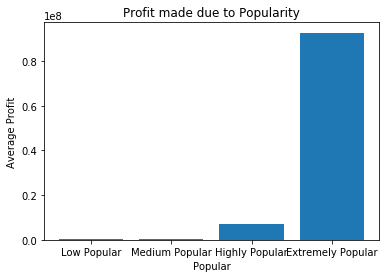

In [24]:
#Dividing the data into separate dataframes based on their popularity levels
low_popular=df.query('popularity_levels=="Low Popular"')
low_popular_mean=low_popular['profit'].mean()
medium_popular=df.query('popularity_levels=="Medium Popular"')
medium_popular_mean=low_popular['profit'].mean()
highly_popular=df.query('popularity_levels=="Highly Popular"')
highly_popular_mean=highly_popular['profit'].mean()
extremely_popular=df.query('popularity_levels=="Extremely Popular"')
extremely_popular_mean=extremely_popular['profit'].mean()
#Plotting the bar
plt.bar([1,2,3,4],[low_popular_mean,medium_popular_mean,highly_popular_mean,extremely_popular_mean],tick_label=['Low Popular','Medium Popular','Highly Popular','Extremely Popular']);
plt.title('Profit made due to Popularity')
plt.xlabel('Popular')
plt.ylabel('Average Profit');

# # Research Question 2 Which is the most famous genre? does the popularity dependent on genre?

In [25]:
#Since I have my genres into different columns like genres_0, genres_1.
# I will check the popular genres going each through this genres dataframe
#grouping by genres_0 to calculate the mean popularity
df_pop=df.groupby('genres_0')['popularity'].mean()
df_pop# to gauge an idea of the different genres available and their sequence
# the 3 most popular genres are :- Adventure,Science Fiction and Animation. Let us take a look at their profits through the bar plot

genres_0
0                  0.167966
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.694063
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64

In [26]:
#grouping by genres_0 to calculate the mean profit 
df_profit=df.groupby('genres_0')['profit'].mean()

<BarContainer object of 21 artists>

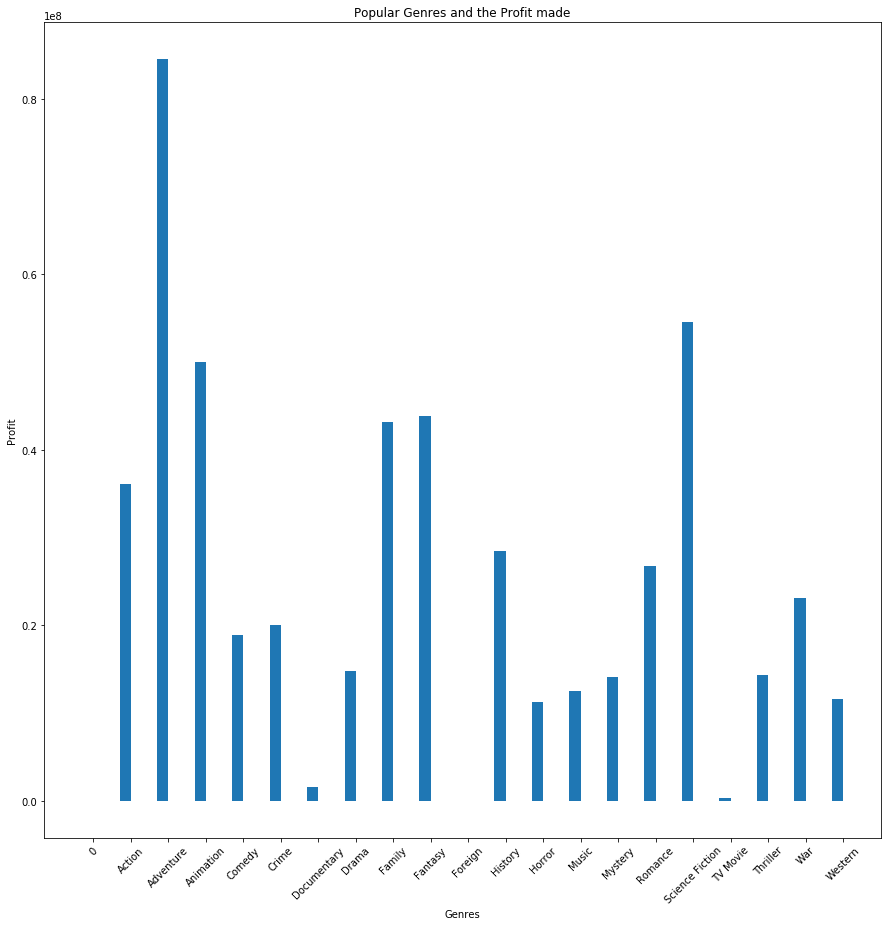

In [27]:
#Preparing to plot the data
ind = np.arange(len(df_profit))  # Arranging the index for x-axis
width = 0.3
# Creating a large figure size to ensure all datapoints are visible
plt.figure(figsize=(15,15))
plt.ylabel('Profit')
plt.xlabel('Genres')
plt.title('Popular Genres and the Profit made')
locations = ind + width / 2  # xtick locations
labels = ['0','Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western']  # xtick labels
labels=plt.xticks(locations, labels,rotation = 45)
plt.bar(ind,df_profit,width)


In [28]:
# The above figure does signify the popular genres make the most profit.
# As we seen the most popular genres are  Adventure,Science Fiction and Animation. 
#Their profits in the above figure are the maximum

# Repeating the same exercise for genres_1
#grouping by genres_0 to calculate the mean popularity
df_pop=df.groupby('genres_1')['profit'].mean()
df_pop# to gauge an idea of the different genres available and their sequence
# the 3 most popular genres are :- Action,Fantasy and Adventure. 
#Let us take a look at their profits through the bar plot



genres_1
Action             5.730941e+07
Adventure          5.987010e+07
Animation          4.896019e+07
Comedy             2.497555e+07
Crime              2.346130e+07
Documentary        4.556537e+05
Drama              1.714058e+07
Family             4.046967e+07
Fantasy            7.578167e+07
Foreign           -7.233203e+04
History            1.317521e+07
Horror             9.590036e+06
Music              1.587943e+07
Mystery            2.479810e+07
Romance            2.349766e+07
Science Fiction    2.551936e+07
TV Movie          -1.034483e+05
Thriller           2.151430e+07
War                2.005664e+07
Western            1.030035e+07
Name: profit, dtype: float64

In [29]:
#grouping by genres_1 to calculate the mean profit 
df_profit=df.groupby('genres_1')['profit'].mean()

<BarContainer object of 20 artists>

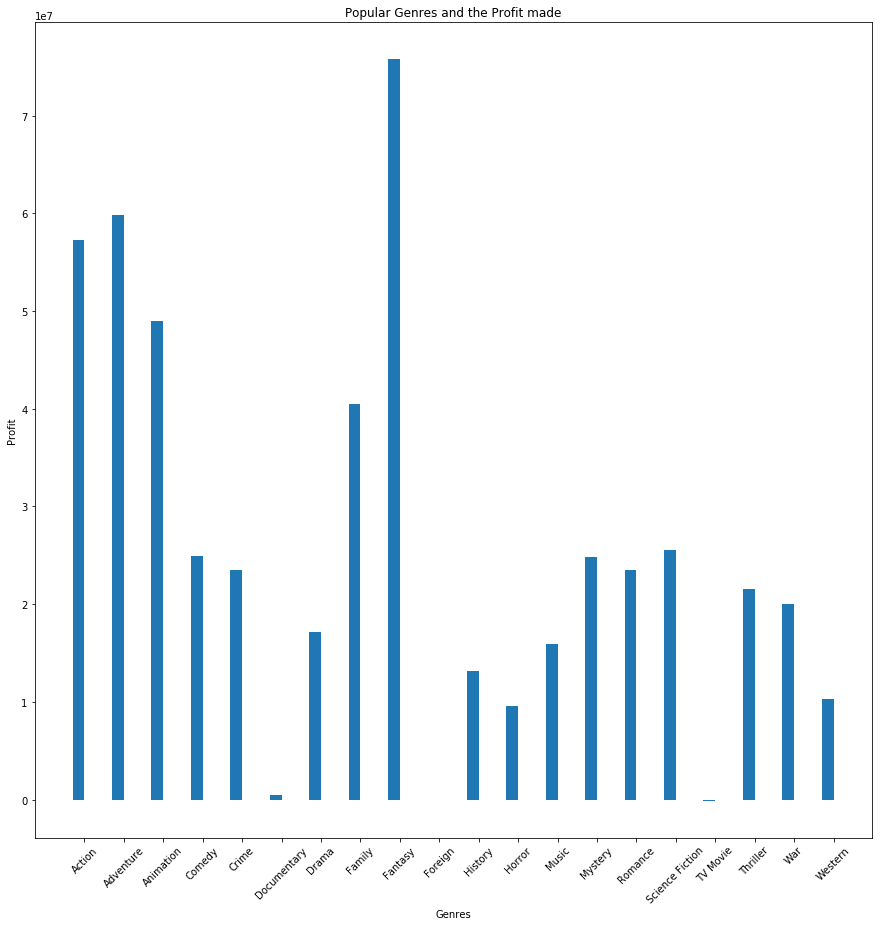

In [30]:
#Preparing to plot the data
ind = np.arange(len(df_profit))  # Arranging the index for x-axis
width = 0.3
# Creating a large figure size to ensure all datapoints are visible
plt.figure(figsize=(15,15))
plt.ylabel('Profit')
plt.xlabel('Genres')
plt.title('Popular Genres and the Profit made')
locations = ind + width / 2  # xtick locations
labels = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western']  # xtick labels
labels=plt.xticks(locations, labels,rotation = 45)
plt.bar(ind,df_profit,width)


In [31]:
# The above figure does indicate the pupular genres(i,e  Action,Fantasy and Adventure)are the ones giving us the maximum profit

### Research Question 3  Does the release year play a role in popularity and its overall profit?

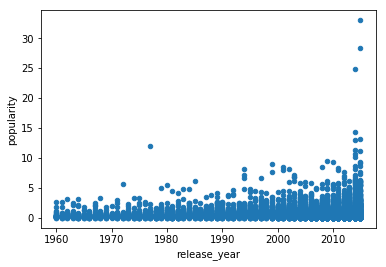

In [32]:
df.plot(x='release_year',y='popularity',kind='scatter')
#Plotting a scatter plot to check the relation

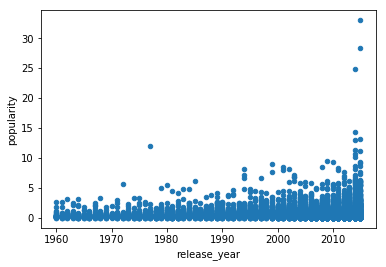

In [33]:
 
df.plot(x='release_year',y='popularity',kind='scatter')

In [34]:
#We do get an understanding that as the years go by, the profits of the movies are increasing. 
#Which means the recent movies are making more profit than the yesteryears. 
#The limitation is we dont know what factor should we owe the increasing profits. Should it be attributed  
#only to the popularity of the movie(as mentioned above) or is it attributed to the increase in number of people watching 
# the movie as the years go by, or is it that the purchasing capacity has increased of the population 
#in general over the years

<a id='conclusions'></a>
## Conclusions

1. Research Question 1:-Popularity plays  a role in the profits of the movie
2. Research Question 2:- The 3 most popular movie genres indeed derives the most profit 
3. Research Question 3:- The year in which the movie was released plays a role in the popularity and the overall profit of the movie. Which means as the year passess by the viewership of movies increase

## Limitations while drawing Conclusions
1. There were many genres attached to one single movie. In this way, it is difficult to judge which genre is most famous or makes most profit. While I have taken the first set of genres which is separated by '|', the ideal scenario would be to have just one genre
2. Many null values present across director, tagline, keywords and genres
3. The limitation is we dont know what factor should we owe the increasing profits. Should it be attributed only to the popularity of the movie (as mentioned above) or is it attributed to the increase in number of people watching the movie as the years go by, or is it that the purchasing capacity has increased of the population over the years. This data is not provided here. Hence the conclusions are derived based on the limited available information